# Multilayer Networks

The limitation on perceptron to linear decision boundaries stymied neural network development. However, eventually (the 1980s I believe) there was a break through that found an architecture that does allow for nonlinear decision boundaries, multilayer networks.

In this notebook we review this model type and show you how to implement it in `sklearn`.

## What You'll Accomplish

In this notebook you'll:
<ul>
    <li>Observe the architecture of a multilayer network,</li>
    <li>Be introduced to additional jargon like <i>hidden layer</i>,</li>
    <li>Learn a theorem on the capabilities of multilayer networks,</li>
    <li>See how these networks are fit,</li>
    <li>Implement them in sklearn.</li>
</ul>

Let's go!

In [1]:
## We'll import these, but I don't know how much 
## we'll use them

## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## Feed Forward Network Architecture

The class of multilayer networks with which we concern ourselves are known as <i>feed forward networks</i>. Let's first show an image and then use that image for our explanation.

<img src="multilayer.png" style="width:60%"></img>

As you might be able to see they are called feed forward networks because each layer feeds directly into the next one.

In particular we have drawn a feed forward network with $2$ <i>hidden layers</i> each with dimension $3$, we call these hidden layes because we only see what is put into the input layer and what comes out of the output layer. So in some sense what goes on in the midden layers is "hidden" to us.

Note that neural networks can have more complex architectures, but for both simplicity and practicality (`sklearn` only allows for feed forward networks) we stick with feed forward networks.

## Mathematical Setup

Let's now show how we can formulate the multilayer network mathematically. We get a bit notation heavy now.

Suppose that we have $n$ observations of $m$ features, let $x$ represent a single observation as an $m$ by $1$ vector. We'll suppose we have $k$ hidden layers and that layer $l$ has $p_l$ nodes within it, and take $h_l$ to denote the vector corresponding to node $l$. Also suppose that the output layer has $o$ nodes. Let $W_1$ be a $p_1$ by $m$ weight matrix, for $l = 2,\dots, k$ let $W_l$ be a $p_l$ by $p_{l-1}$ weight matrix, and let $W_{k+1}$ be an $o$ by $p_k$ weight matrix. Finally take $\Phi$ to be some activation function.

Then we can set up how the output of the network is calculated with these recursively defined equations:
$$
\begin{array}{l l r}
h_1 =  & \Phi (W_1 x) & \text{Input to Hidden Layer }1 \\
h_{l+1} = & \Phi (W_{l+1} h_l) \ \forall l = 1, 2, \dots, k-1 & \text{Hidden Layer } l \text{ to Hidden Layer } l+1 \\
\hat{y} = & \Phi(W_{k+1} h_k) & \text{Hidden Layer } k \text{ to Output Layer}
\end{array}
$$

For now we'll stick with an abstract activation function, but we mention a number of options before ending the notebook.

Also, sometimes you may see architecture diagrams that use represent the nodes as giant rectangles meant to represent the vectors in the recursive equations.

<img src="multilayer2.png" style="width:60%"></img>

## Implementing in `sklearn`

Before worrying about how we can fit this algorihtm. Let's take a quick break from the math and show how we can fit a multilayer network in `sklearn`. We'll stick to classification with `MLPClassifier`, but you can also do regression tasks with `MLPRegressor`. Here are the documentation pages for both:
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html">https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html</a>

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html">https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html</a>

In [2]:
from sklearn.datasets import make_moons

In [3]:
X_train,y_train = make_moons(1000,noise=.3)
X_test,y_test = make_moons(500,noise=.3)

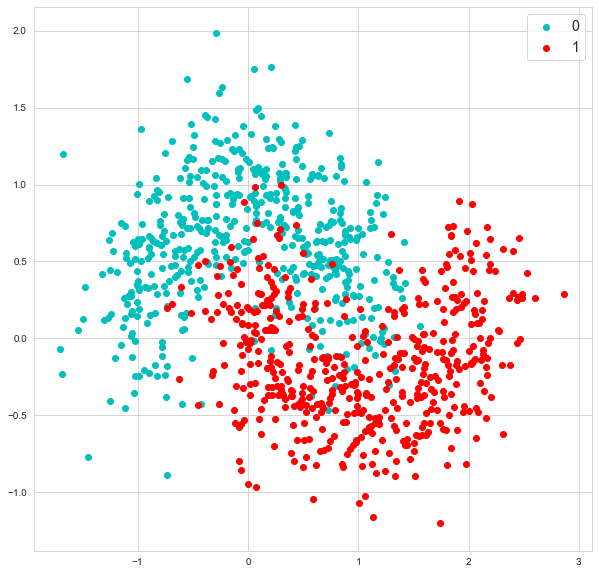

In [4]:
plt.figure(figsize=(10,10))

plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],c='c',label='0')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],c='r',label='1')

plt.legend(fontsize=14)

plt.show()

In [5]:
# import MLPClassifier
from sklearn.neural_network import MLPClassifier

In [6]:
# this makes an mlp classifier with 1 hidden layer
# this layer has 100 nodes
mlp = MLPClassifier(hidden_layer_sizes=(500,),max_iter=1000)

In [7]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(500,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [8]:
x1 = np.linspace(-3,3,100);
x2 = np.linspace(-2,2,100);
x1v,x2v = np.meshgrid(x1,x2)

X_grid = np.concatenate([x1v.reshape(-1,1),x2v.reshape(-1,1)],axis=1)

In [9]:
pred = mlp.predict(X_grid)

test_acc = sum(mlp.predict(X_test) == y_test)/len(y_test)

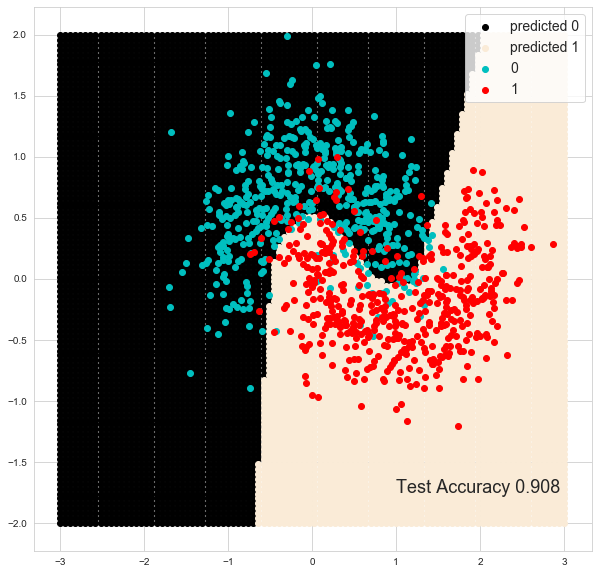

In [10]:
plt.figure(figsize=(10,10))



plt.scatter(X_grid[pred == 0,0],X_grid[pred==0,1],c='k',label="predicted 0")
plt.scatter(X_grid[pred == 1,0],X_grid[pred==1,1],c='antiquewhite',label="predicted 1")
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],c='c',label='0')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],c='r',label='1')

plt.text(1,-1.75,"Test Accuracy " + str(np.round(test_acc,4)), fontsize=18)

plt.legend(fontsize=14)

plt.show()

## Practice

Let's have you do a short break out session we'll work through two problems just so you get comfortable with the `sklearn` functionality then we'll go back to the mathematics.

In [11]:
## Let's first show that mlps can
## do what perceptrons can't
X = np.array([[0,0],[0,1],[1,0],[1,1]])

y = np.array([1,-1,-1,1])

In [12]:
## Fit an MLPClassifier on these data,
## can it separate them?






In [13]:
## Additional code here if needed








In [14]:
## Now lets fit a classifier on the make_circles data
from sklearn.datasets import make_circles

In [15]:
X_train,y_train = make_circles(3000,noise=.4,factor=.2)
X_test,y_test = make_circles(1000,noise=.4,factor=.2)

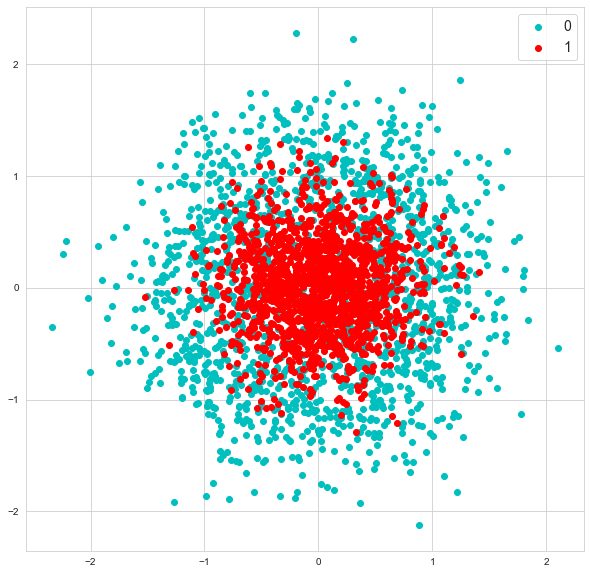

In [16]:
plt.figure(figsize=(10,10))

plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],c='c',label='0')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],c='r',label='1')

plt.legend(fontsize=14)

plt.show()

In [17]:
## Fit an MLP classifier to this data
## and fit a svm with rbf kernel
## Which do you expect to perform better using cv?






In [18]:
## Additional code here if needed








In [19]:
## Additional code here if needed








In [20]:
## Additional code here if needed








In [21]:
## Additional code here if needed








## How is a Multilayer Network Fit? Backpropagation

We'll now introduce the process by which we fit a multilayer network, i.e. how do we find the optimal weights.

Backpropagation is just a fancy name for the chain rule mixed with gradient descent. We'll demonstrate with two incredibly simple architectures. Here is the first.

<img src="simple.png" style="width:60%">

In this architecture we have: 

$$
h_1 = \Phi (w_1 x_1),
$$

$$
h_2 = \Phi (w_2 h_1),
$$

$$
\hat{y} = \Phi(w_3 h_2).
$$

Backpropagation consists of a <i>forwards step</i> and a <i>backwards step</i>.

### The Forwards Step


Let $w = \left(w_1, w_2, w_3\right)^T$. As with the perceptron we initialize $w$ with random weights. Then run a randomly selected training point, $x^{(i)}$ through the network getting the values for each layer of the network along the way.

So when the forward step is completed you have a $\hat{y}$ and $h$s for each layer of the network.

### The Backwards Step

The backwards step is how we update our weights, $w$. Let our cost function be $C = (\hat{y} - y)^2$.

In order to update $w$ we use gradient descent, so $w_{\text{new}} = w_\text{old} - \eta \nabla C(w_\text{old})$, where the gradient is taken with respect to $w$, $\eta$ is a hyperparameter called the learning rate, and for the purposes of our derivation we'll assume that $C$ is differentiable with respect to all of the weights (there are work arounds for activation functions that aren't differentiable everywhere).

The backwards step is where backpropagation gets its name, as we'll see now.

Using the chain rule we can find $\frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}, $ and $\frac{\partial C}{\partial w_3}$.

$$
\frac{\partial C}{\partial w_3} = \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial w_3} = 2\left( \hat{y} - y \right) \Phi'(w_3 h_2) h_2
$$
<br>
$$
\frac{\partial C}{\partial w_2} = \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial h_2} \frac{\partial h_2}{\partial w_2} = 2(\hat{y} - y) \Phi'(w_3 h_2) w_3 \Phi'(w_2 h_1) h_1
$$
<br>
$$
\frac{\partial C}{\partial w_1} = \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial h_2} \frac{\partial h_2}{\partial h_1} \frac{\partial h_1}{\partial w_1} = 2(\hat{y} - y) \Phi'(w_3 h_2) w_3 \Phi'(w_2 h_1) w_2 \Phi'(w_1 x_1^{(i)}) x_1^{(i)}
$$

In all of the above expressions we take each of the values to be the one we found in forwards step.

### The Gradient Adjustment

Then before we randomly choose another training instance we update the weights by performing $w_{\text{new}} = w_\text{old} - \eta \nabla C(w_\text{old})$

### Epochs

This is done cycling through all of the training points in random order, each cycle through is called an epoch.

### That's It!

While this was an incredibly simple example that's really all backpropagation is. The only thing that gets more complicated with more complex feed forward network architectures is the indexing, which makes for a computational nightmare in terms of keeping track, hence the simple example.

### Common Adjustments to the Gradient Descent

Two common adjustments come to the gradient descent steps. 

1. Sometimes in order to speed up calculations on all of the training points you'll perform batch gradient descent in which small batches of points are run through the forwards step with the same $w$ and then for the update you use the average of the batch's backwards step.

2. Instead of selecting $\eta$ by hand you can let it be a random value for each step. The idea being it can help you get out of local minima of the cost function.

## Practice 

In this practice you'll do two things.

1. Get practice calculating the backpropagation by hand, and

2. Fitting a multiple output network on the MNIST data set.

### 1. 

Look at this architecture that comes from the following blog post (don't cheat and just look up the solution though!), <a href="https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/">https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/</a>

<img src="practice.png" style="width:80%"></img>

This is both our first time with a multi-output network and a network with bias so I'll help you with the set up. To get started here are the formulas for $h_1$ and $h_2$.

$$
h_1 = \Phi(w_1 x_1 + w_2 x_2 + b_1)
$$

$$
h_2 = \Phi(w_3 x_1 + w_4 x_2 + b_1)
$$

Also in the case of a multi-output network our cost function is a sum of the two errors:
$$
C = (o_1 - y_1)^2 + (o_2 - y_2)^2,
$$
where $y = (y_1,y_2)$ and $o_1,o_2$ can be thought of as the $\hat{y}$ in our simple example.

For this problem:
<ul>
    <li>Set up the equations for $o_1$ and $o_2$ in terms of $h_1$ and $h_2$,</li>
    <li>Calculate $\partial C/\partial w_5$, $\partial C/ \partial w_1$ and $\partial C/\partial b_2$.
</ul>

You may record your answers in the markdown block if you'd like to, math can be entered with typical latex commands with equations being contained in dollar signs.

### 2. 

Load in the MNIST training and test sets.

Train an `MLPClassifier` on the training set and evaluate the test error. See how training different architectures affects the outcome.

Note you may want to perform dimensionality reduction using PCA to speed up the run time.

In [22]:
## Load the data
nums = pd.read_csv("https://raw.githubusercontent.com/cerndb/dist-keras/master/examples/data/mnist.csv")

X = np.array(nums.iloc[:,1:])
y = np.array(nums.iloc[:,0])

In [23]:
## Code here






In [24]:
## Additional code here if needed








In [25]:
## Additional code here if needed





In [26]:
## Additional code here if needed








In [27]:
## Additional code here if needed








In [28]:
## Additional code here if needed



‘identity’, ‘logistic’, ‘tanh’, ‘relu’




## Different Activation Functions

Now let's briefly show the four activation functions, $\Phi$ that are used by `sklearn`.

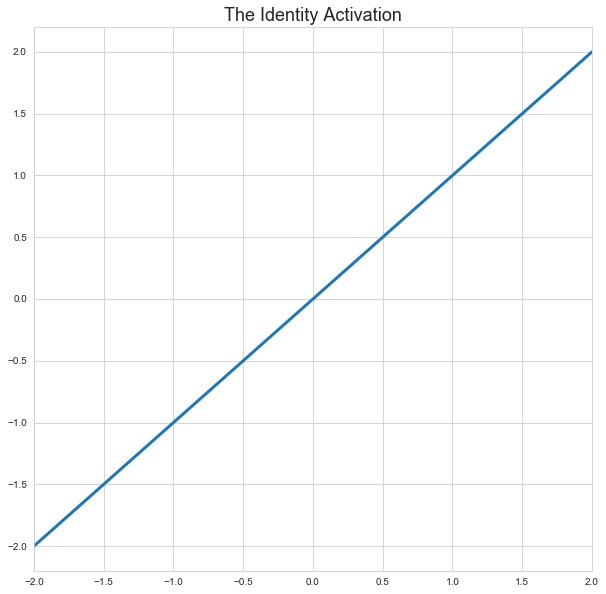

In [42]:
# First the identity
# which is technically not nonlinear but whatever
plt.figure(figsize=(10,10))

plt.plot(np.linspace(-2,2,100),np.linspace(-2,2,100), linewidth = 3)

plt.xlim(-2,2)

plt.title("The Identity Activation",fontsize=18)

plt.show()

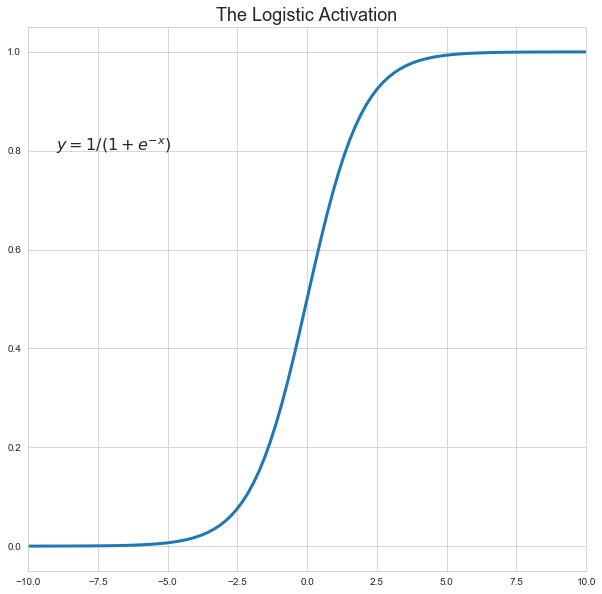

In [41]:
## the logistic function
plt.figure(figsize=(10,10))

x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))

plt.plot(x,y, linewidth = 3)

plt.xlim(-10,10)

plt.text(-9,.8,"$y = 1/(1+e^{-x})$", fontsize=16)

plt.title("The Logistic Activation",fontsize=18)

plt.show()

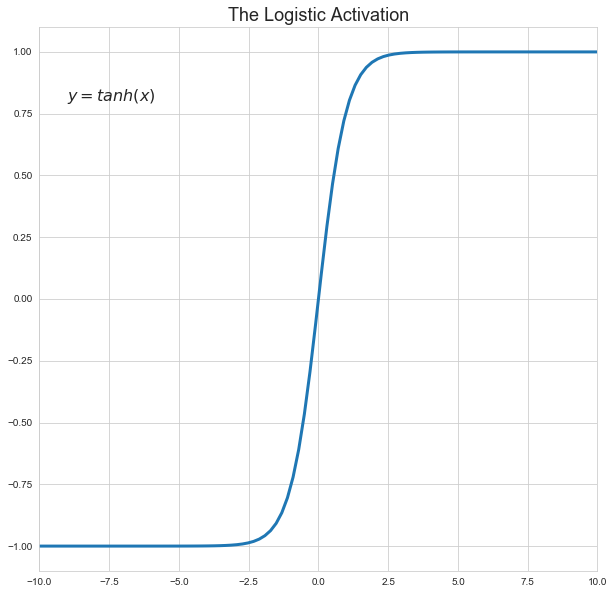

In [46]:
## the hyperbolic tan function
plt.figure(figsize=(10,10))

x = np.linspace(-10,10,100)
y = np.tanh(x)

plt.plot(x,y, linewidth = 3)

plt.xlim(-10,10)

plt.text(-9,.8,"$y = tanh(x)$", fontsize=16)

plt.title("The Logistic Activation",fontsize=18)

plt.show()

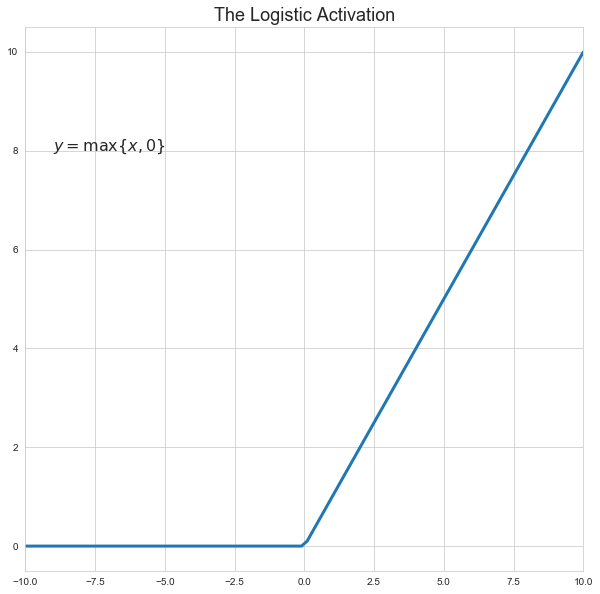

In [54]:
## the Rectified Linear Unit [ReLU] function
plt.figure(figsize=(10,10))

x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
y[x<0] = 0

plt.plot(x,y, linewidth = 3)

plt.xlim(-10,10)

plt.text(-9,8,"$y = \max\{x,0\}$", fontsize=16)

plt.title("The Logistic Activation",fontsize=18)

plt.show()

The default in both `sklearn`'s `MLPRegressor` and `MLPClassifier` is ReLU.

## Universal Approximator

It has been proven mathematically that "a feed-forward network with a single hidden layer containing a finite number of neurons can approximate continuous functions on compact subsets of Rn, under mild assumptions on the activation function. The theorem thus states that simple neural networks can represent a wide variety of interesting functions when given appropriate parameters", <a href="https://en.wikipedia.org/wiki/Universal_approximation_theorem">https://en.wikipedia.org/wiki/Universal_approximation_theorem</a>.

So we've done it! We've found the best machine learning algorithm and we should end class here.

<img src="wellyes.png" style="width:60%"><img>

Continuing on from wikipedia: "however, it does not touch upon the algorithmic learnability of those parameters."

Meaning that while yes we can theoretically approximate any reasonable function with a high enough dimensional single hidden layer feed forward network, this is not always practically possible.

Which leads us to the deficiencies of feed forward networks in practice.

## Deficiencies

1. Feed Forward Neural Nets can very easily overfit the training data. To control for this you can use regularization similar to lasso or ridge regression. You can also input early stopping rules which stops the backpropagation before overfitting occurs. Another technique is to employ ensembles of networks as an additional way to decrease variance of the model, for example with bagging.

2. Gradients can vanish or explode when your networks get too deep because of the chain rule.

3. Convergence can be slow and difficult.

4. Cost functions often have many local minima that you can get stuck in when using normal gradient descent with a fixed learning rate.

5. For complicated networks a normal laptop may not suffice and you'll need more powerful hardware.

## Deep Learning

Before Going let's mention the concept of deep learning. It has been found that you can trade in the height of a single hiddent layer for increased depth and get similar results. Wanting to understand the possibilities and limitations of such architecture is where the field of deep learning comes from.

## References

The following were extremely helpful in understanding multilayer neural nets.

This entire 4 video youtube series, <a href="https://www.youtube.com/watch?v=aircAruvnKk">https://www.youtube.com/watch?v=aircAruvnKk</a>.

This blog post, <a href="https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/">https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/</a>.

This online book <a href="http://neuralnetworksanddeeplearning.com/chap2.html">http://neuralnetworksanddeeplearning.com/chap2.html</a>.

And the book mentioned in the perceptron notebook <a href="
